In [1]:
# !pip3 install torch torchvision torchaudio

In [2]:
import torch
from torch import nn

import torch.nn.functional as F
import torch.optim as optim

In [3]:
from model.dataset import BatchGenerator

data = BatchGenerator()

for x, y in data:
    print(x.shape, y.shape)
    break
    
data._make_random_noise().shape

augmenting:   0%|          | 0/20000 [00:00<?, ?it/s]

augmenting:   0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

(256, 1, 28, 28) (256,)


(1, 28, 28)

In [4]:
from model.model import Model

model = Model()

In [5]:
import numpy as np
def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    return (pred == y_test).mean()

evaluate(model, data.test_X, data.test_y)

0.07538461538461538

In [6]:
from tqdm.notebook import trange

for epoch in trange(20):
    for x, y in data:
        loss = model.train_on_batch(x, torch.Tensor(y).long())
    print(epoch, evaluate(model, data.test_X, data.test_y))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

0 0.8913076923076924


  0%|          | 0/300 [00:00<?, ?it/s]

1 0.9592307692307692


  0%|          | 0/300 [00:00<?, ?it/s]

2 0.9773846153846154


  0%|          | 0/300 [00:00<?, ?it/s]

3 0.9824615384615385


  0%|          | 0/300 [00:00<?, ?it/s]

4 0.9844615384615385


  0%|          | 0/300 [00:00<?, ?it/s]

5 0.9859230769230769


  0%|          | 0/300 [00:00<?, ?it/s]

6 0.9866153846153846


  0%|          | 0/300 [00:00<?, ?it/s]

7 0.9883076923076923


  0%|          | 0/300 [00:00<?, ?it/s]

8 0.9884615384615385


  0%|          | 0/300 [00:00<?, ?it/s]

9 0.9878461538461538


  0%|          | 0/300 [00:00<?, ?it/s]

10 0.9894615384615385


  0%|          | 0/300 [00:00<?, ?it/s]

11 0.9903846153846154


  0%|          | 0/300 [00:00<?, ?it/s]

12 0.9912307692307692


  0%|          | 0/300 [00:00<?, ?it/s]

13 0.9906923076923076


  0%|          | 0/300 [00:00<?, ?it/s]

14 0.9903846153846154


  0%|          | 0/300 [00:00<?, ?it/s]

15 0.9907692307692307


  0%|          | 0/300 [00:00<?, ?it/s]

16 0.9913076923076923


  0%|          | 0/300 [00:00<?, ?it/s]

17 0.9915384615384616


  0%|          | 0/300 [00:00<?, ?it/s]

18 0.9916923076923077


  0%|          | 0/300 [00:00<?, ?it/s]

19 0.9921538461538462


In [7]:
from model.helpers import transform_white_on_black, transform_black_on_white

model.predict_one(data.test_X[5])

1

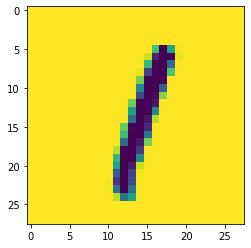

In [8]:
from matplotlib import pyplot as plt

plt.imshow(data.test_X[5][0])
plt.show()

In [9]:
import pickle

with open('./models/mnist_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [10]:
import pickle
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

with open('./models/mnist_model.pkl', 'rb') as f:
    model = pickle.load(f)
model

Model(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (activation1): LeakyReLU(negative_slope=0.01)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.2, inplace=False)
  (activation2): LeakyReLU(negative_slope=0.01)
  (conv3): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout3): Dropout2d(p=0.2, inplace=False)
  (activation3): LeakyReLU(negative_slope=0.01)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc4): Linear(in_features=120, out_features=50, bias=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (activation4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear

In [11]:
evaluate(model, data.test_X, data.test_y)

0.9921538461538462